This notebook gives some example for calculating the magnetic fields and gradients using the Functions defined in field.py

In [31]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import fields as f
import fields_plot as fp
import nv_optical_response as nv
# from b26_toolkit.src.data_analyis import nv_optical_properties as nv

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt

%matplotlib inline

## Info

to get infos about the functions, call help:

In [2]:
?f.calc_B_field_single_dipole

## define the general parameters

In [59]:
#     a: radius in um
#     Br: surface magnetization in Teslas
#     phi_m: polar angle in deg
#     theta_m: azimuthal angle in deg
#     d_bead_z: distance top of bead to NV plane
#     mu_0: vacuum permeability ( T m /A)
#     d_bead_z: distance between bead and z plane
#     dx: distance between points (in um)
#     x_min, x_max, y_min, y_max: plot dimensions (in um)

p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.4 ,
    'phi_m' : 90,
    'theta_m' : 90,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.2,
    'xmax':5
}



## plot total magnetic field - single dipole

duration: 0.01 min


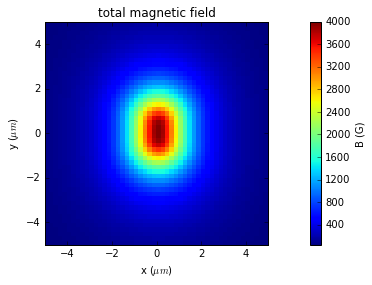

In [60]:
data = f.calc_B_field_single_dipole(p)
fig = fp.plot_Bfield_mag(data, title ='total magnetic field')

# save figure
# fig.savefig('data/'+f.p_to_filename(p) + 'total_field.png')

## gradient along single NV

duration: 0.01 min
min max -5.0 5.0


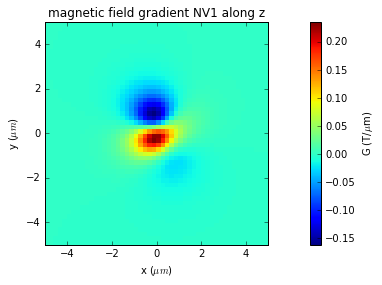

In [61]:

nv_id =1 # select a NV [1,2,3,4]
# for nv_id in [1,2,3, 4]:

s= nv.nNV[nv_id-1] # NV orientation 
n = [0,0,1] # direction of gradient

data = f.calc_Gradient_single_dipole(p, s, n)
fig = fp.plot_G(data, title ='magnetic field gradient NV{:0d} along z'.format(nv_id))

## gradient in x-y plane for single NV

duration: 0.01 min
duration: 0.01 min
min max -5.0 5.0


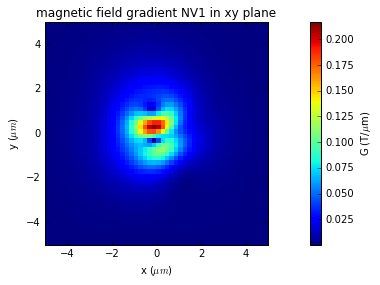

In [62]:
nv_id =1 # select a NV [1,2,3,4]

s= nv.nNV[nv_id-1] # NV orientation 

# calculate gradent along x
n = [1,0,0] # direction of gradient
data = f.calc_Gradient_single_dipole(p, s, n)
# calculate gradent along y
n = [0,1,0] # direction of gradient
data2 = f.calc_Gradient_single_dipole(p, s, n)

# now calculate the avrg gradient in xy
data['G'] = np.sqrt(data['G']**2+data2['G']**2)
fig = fp.plot_G(data, title ='magnetic field gradient NV{:0d} in xy plane'.format(nv_id))

## gradient in x-y plane for single NV

In [64]:
# nv_id =1 # select a NV [1,2,3,4]

# s= nv.nNV[nv_id-1] # NV orientation 

# # calculate gradent along x
# n = [1,0,0] # direction of gradient
# datax = f.calc_Gradient_single_dipole(p, s, n)
# # calculate gradent along y
# n = [0,1,0] # direction of gradient
# datay = f.calc_Gradient_single_dipole(p, s, n)

# dataz = f.calc_Gradient_single_dipole(p, s, n)

# # now calculate the avrg gradient in xy divided by the gradient in z
# data = datax
# data['G'] = np.sqrt(datax['G']**2+datay['G']**2)/dataz['G']
# fig = fp.plot_G(data, title ='magnetic field gradient NV{:0d} in xy plane'.format(nv_id))

# more complicated things, e.g. calculate fields and gradients for 2 dipoles

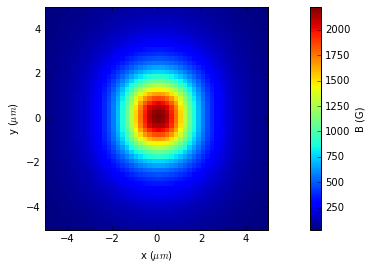

In [65]:
p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.4 ,
    'phi_m' : 90,
    'theta_m' : 90,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.2,
    'xmax':5
}

s= nv.nNV[nv_id-1] # NV orientation 

# calculate gradent along x
n = [1,0,0] # direction of gradient



# ====== begin ========

# get the positions for which to calculate the field and the magnetic moment
r, M = f.p_to_positions(p)

# two dipoles at x=1 and x=-1 and y=z=0
DipolePositions = np.array([
      [-0.5,0,0],[0.5,0,0]
    ])
M = np.ones([len(DipolePositions),1])*M


data = f.calcBfield(r, DipolePositions, M)

fig = fp.plot_Bfield_mag(data)

min max -5.0 5.0


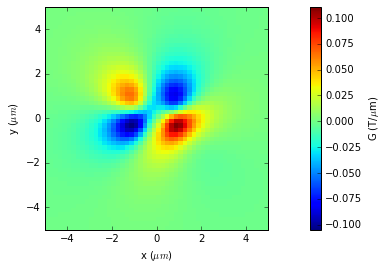

In [66]:
data = f.calcGradient(r, DipolePositions, M, s, n)

fig = fp.plot_G(data)